In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# original_image_dir = '/content/drive/MyDrive/project/test_seg'  # Where your original images are stored
#     json_file = '/content/drive/MyDrive/project/test_seg/_annotations.coco.json'
#     mask_output_folder = '/content/drive/MyDrive/project/op_seg/mask'  # Modify this as needed. Using val2 so my data is not overwritten
#     image_output_folder = '/content/drive/MyDrive/project/op_seg/image'  #

Mounted at /content/drive


In [ ]:
!pip install pycocotools

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 2

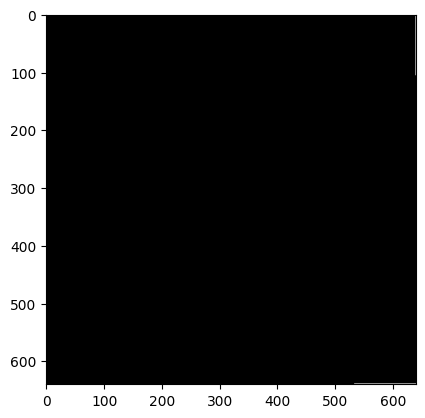

In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# Initialize COCO instance
coco = COCO('/content/drive/MyDrive/project/op_seg/_annotations.coco.json')

# Directory containing images
img_dir = '/content/drive/MyDrive/project/op_seg/train'

# Directory to save masks
mask_dir = '/content/drive/MyDrive/project/op_seg/masks'
os.makedirs(mask_dir, exist_ok=True)

# Iterate through all image IDs
print(coco.imgs.keys())
for image_id in coco.imgs.keys():
    img_info = coco.imgs[image_id]

    # Load image
    image = np.array(Image.open(os.path.join(img_dir, img_info['file_name'])))

    # Get annotations
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    if anns:  # Check if annotations are available
        # Create mask
        mask = coco.annToMask(anns[0])
        for i in range(1, len(anns)):  # Start from index 1
            mask += coco.annToMask(anns[i])

        plt.imshow(mask, cmap=plt.cm.binary)
        # unique_values, counts = np.unique(mask, return_counts=True)
        # print(f"Unique values in mask: {unique_values}")
        # print(f"Counts of each value: {counts}")

        new_mask = np.where(mask == 2, 255, mask)
        new_mask = np.where(mask == 1, 255, mask)

        #mask_scaled = mask.astype(np.float32) / 255
        #mask_rgb = np.repeat(mask_scaled[..., np.newaxis], 3, axis=-1)

        # Save mask
        original_img_name = img_info['file_name']
        mask_filename = os.path.join(mask_dir, f'mask_{original_img_name}.jpg')

        try:
            Image.fromarray(new_mask).save(mask_filename)
        except Exception as e:
            print(f"Error saving mask: {e}")
    else:
        print(f"No annotations found for image {image_id}.")
        # Save a black image
        black_image = np.zeros_like(image)
        original_img_name = img_info['file_name']
        mask_filename = os.path.join(mask_dir, f'mask_{original_img_name}.jpg')
        Image.fromarray(black_image).save(mask_filename)





loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


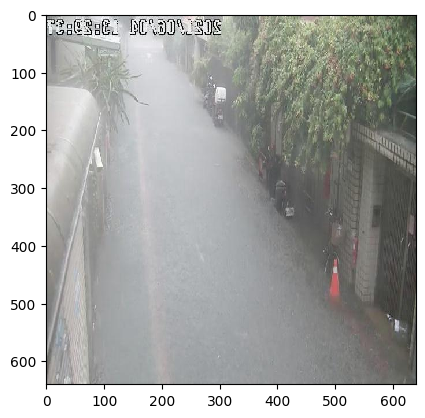

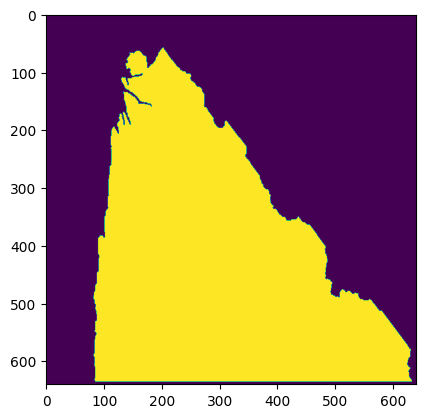

In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

coco = COCO('/content/drive/MyDrive/project/test_seg/_annotations.coco.json')
img_dir = '/content/drive/MyDrive/project/test_seg'
image_id = 89

img = coco.imgs[image_id]

image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))
for ann in anns:
    anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])

plt.imshow(anns_img)

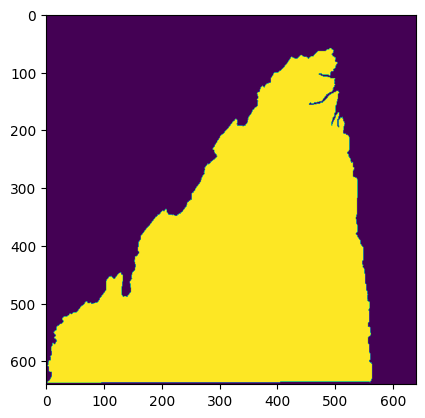

In [ ]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)